In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from datetime import datetime

C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir(r'C:\Users\Home\Documents\Laboral2020\Konrad Lorenz\MachineLearning\Clase10')

In [4]:
housing=pd.read_csv('housing.csv')

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Se imputará lael total de caurtas mediante la mediana:

In [7]:
median_total_bedrooms = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [7]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [11]:
housing_num = housing.copy()
col_names = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
             'households','median_income','rooms_per_household','bedrooms_per_room',
             'population_per_household']
housing_num_scaled = housing_num[col_names]
scaler = StandardScaler().fit(housing_num_scaled.values)
housing_num_scaled = scaler.transform(housing_num_scaled.values)
housing_num_scaled.shape

(20640, 11)

Se crearán las dummies para las variables categóricas

In [12]:
housing_cat=housing[["ocean_proximity"]]

In [13]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [14]:
housing_cat_1hot=housing_cat_1hot.toarray()
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [12]:
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
X=np.c_[housing_num_scaled,housing_cat_1hot]
X

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
y=housing['median_house_value'].to_numpy()
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

El anterior procesamiento es más útil disponerlo en una función para aplicarlo sobre el conjunto de prueba:

In [17]:
def preprocesamiento(data): 
    median_total_bedrooms = data["total_bedrooms"].median() # option 3
    data["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)
    data["rooms_per_household"] = data["total_rooms"]/data["households"]
    data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
    data["population_per_household"]=data["population"]/data["households"]

    data_num = data.copy()
    col_names = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
             'households','median_income','rooms_per_household','bedrooms_per_room',
             'population_per_household']

    data_num_scaled = data_num[col_names]
    scaler = StandardScaler().fit(data_num_scaled.values)
    data_num_scaled = scaler.transform(data_num_scaled.values)

    data_cat=data[["ocean_proximity"]]
    cat_encoder = OneHotEncoder()
    data_cat_1hot = cat_encoder.fit_transform(data_cat)
    data_cat_1hot=data_cat_1hot.toarray()
    X=np.c_[data_num_scaled,data_cat_1hot]
    y=data['median_house_value'].to_numpy()
    salida=[X,y]
    return(salida)

In [18]:
housing=pd.read_csv('housing.csv')

In [20]:
housing_data=preprocesamiento(housing)
housing_data[0].shape

(20640, 16)

In [21]:
housing_data[1].shape

(20640,)

In [22]:
X=housing_data[0]
y=housing_data[1]

Se particionará la muestra en conjunto de entrenamiento y de prueba:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12345)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


70054.67937536661

In [23]:
stats.describe(y)

DescribeResult(nobs=20640, minmax=(14999.0, 500001.0), mean=206855.81690891474, variance=13316148163.035278, skewness=0.9776922140978416, kurtosis=0.3275001388119616)

[]

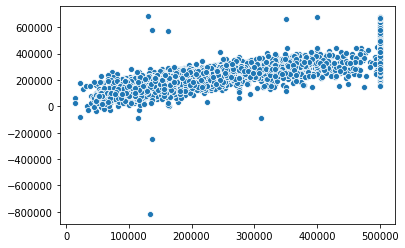

In [26]:
sns.scatterplot(y_test, housing_predictions).plot()


Observe que la raiz cuadrada del error cuadratico medio parece ser muy alto dado el rango de los datos: (14999.0, 500001.0)

In [27]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
housing_predictions_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69861.75727012708

Para tener mayor certeza del error de predicción, se realizará validación cruzada.

In [29]:
# Linear Model
scores_lm = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lm_rmse_scores = np.sqrt(-scores_lm)
# Train Model
train_scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-train_scores)

In [30]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
Los resultados de varidación cruzara para la regresión líneal:

In [31]:
display_scores(lm_rmse_scores)

Scores: [70579.09284744 72701.51189081 66415.32177575 71691.27863741
 66421.60057084 62529.69618949 68627.11368764 67737.59345587
 67950.47960289 68249.5987795 ]
Mean: 68290.32874376237
Standard deviation: 2774.747166199763


In [ ]:
Los resultados de varidación cruzara para el árbol de clasificación:

In [32]:
display_scores(tree_rmse_scores)

Scores: [70065.85711812 70636.81233482 67941.7065627  69765.41332023
 71901.39833844 70359.34538595 69240.789593   71555.16718064
 68308.76228483 75288.33000172]
Mean: 70506.35821204643
Standard deviation: 1992.5760429904599


Observe que un árbol no mejorar la capacidad predictiva del modelo de regresión. Se abordará el problema con un random Forest:

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
score_rf = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-score_rf)
display_scores(tree_rmse_scores)

Scores: [52353.58057984 50343.92339439 47383.20327595 50543.07557747
 51470.56682127 46863.30811541 50048.58201915 50595.91376423
 48609.04982852 50692.56386389]
Mean: 49890.37672401102
Standard deviation: 1656.9028838547981


Este modelo mejora significativamente el desempeño. Sin embargo se buscará optimizarlo a través de una busqueda de grilla:

Hay un total de 3 X 4 + 2 X 3 = 18 escenarios:

In [36]:
# n_estimators: This is the number of trees
# The benefit of random forests comes from its creating a large variety of trees by sampling both observations and features. Bootstrap = False is telling it to sample observations with or without replacement - it should still sample when it's False, just without replacement.
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()

In [39]:
start_time = datetime.now()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:01.125020


In [40]:
 grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Los resultados de las métricas se pueden sacar para cada una de los escenarios:

In [42]:
cvres = grid_search.cv_results_

In [43]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64120.32452140838 {'max_features': 2, 'n_estimators': 3}
54628.94947004035 {'max_features': 2, 'n_estimators': 10}
52525.76750713545 {'max_features': 2, 'n_estimators': 30}
58952.486788987386 {'max_features': 4, 'n_estimators': 3}
52340.348211518154 {'max_features': 4, 'n_estimators': 10}
49973.00148239985 {'max_features': 4, 'n_estimators': 30}
59044.99028674764 {'max_features': 6, 'n_estimators': 3}
51355.57492484716 {'max_features': 6, 'n_estimators': 10}
49697.13950236023 {'max_features': 6, 'n_estimators': 30}
58034.15696667902 {'max_features': 8, 'n_estimators': 3}
51948.65413403904 {'max_features': 8, 'n_estimators': 10}
49868.235434942675 {'max_features': 8, 'n_estimators': 30}
61772.53399106886 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54153.42786439305 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59782.19174336477 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52417.7579982286 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

Cuando los escenarios sean muy extensos (este no es el caso puesto que sólo hay 18 escenarios).

In [44]:
start_time = datetime.now()
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,n_iter=10)
random_search.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:34.959056


In [45]:
random_search.best_params_

{'n_estimators': 30, 'max_features': 8}

Se puede por lo tanto refinar un modelo mucho más complejo usando random_search:

In [46]:
X.shape

(20640, 16)

In [69]:
param_grid2 = [
 {'bootstrap': [False, True], 'n_estimators':  list(range(30,50, 2)), 'max_features': list(range(2,15, 2))},
 ]
param_grid2

[{'bootstrap': [False, True],
  'n_estimators': [30, 32, 34, 36, 38, 40, 42, 44, 46, 48],
  'max_features': [2, 4, 6, 8, 10, 12, 14]}]

In [70]:
start_time = datetime.now()
random_search2 = RandomizedSearchCV(forest_reg, param_distributions=param_grid2,cv=5,scoring='neg_mean_squared_error',return_train_score=True,n_iter=20, random_state=1234)
random_search2.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:06:22.331243


In [53]:
random_search2.best_params_

{'n_estimators': 48, 'max_features': 6, 'bootstrap': False}

In [55]:
RF_final= RandomForestRegressor(n_estimators=48,max_features=6,bootstrap=False)
RF_final.fit(X_train, y_train)
housing_predictions_RF_final = RF_final.predict(X_test)
rf_final_mse = mean_squared_error(y_test, housing_predictions_RF_final)
rf_final_rmse = np.sqrt(rf_final_mse)
rf_final_rmse

47961.61324665271

In [59]:
cvres = random_search2.cv_results_
for mean_score, param_grid2 in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), param_grid2)

51056.813351351506 {'n_estimators': 42, 'max_features': 2, 'bootstrap': False}
49490.59631204255 {'n_estimators': 42, 'max_features': 6, 'bootstrap': True}
49571.56283211067 {'n_estimators': 32, 'max_features': 6, 'bootstrap': True}
49583.468833273495 {'n_estimators': 38, 'max_features': 6, 'bootstrap': True}
48365.559911570905 {'n_estimators': 48, 'max_features': 6, 'bootstrap': False}
49026.79994560277 {'n_estimators': 42, 'max_features': 8, 'bootstrap': False}
52214.30168194327 {'n_estimators': 38, 'max_features': 2, 'bootstrap': True}
48769.322716139606 {'n_estimators': 44, 'max_features': 6, 'bootstrap': False}
49163.19546832801 {'n_estimators': 40, 'max_features': 8, 'bootstrap': False}
49968.47886001074 {'n_estimators': 34, 'max_features': 10, 'bootstrap': False}
49457.37025471076 {'n_estimators': 36, 'max_features': 6, 'bootstrap': True}
51385.335429409795 {'n_estimators': 38, 'max_features': 12, 'bootstrap': False}
50476.02602108259 {'n_estimators': 44, 'max_features': 14, 'bo

In [65]:
housing_predictions_RF_final

array([250391.66666667, 257718.79166667, 117945.83333333, ...,
       153868.75      , 291612.52083333,  79279.16666667])

In [66]:
y_test

array([322300., 243300., 119000., ..., 141400., 410000., 110300.])

In [67]:
df = pd.DataFrame([y_test,housing_predictions_RF_final])

#  columns=["median_income","prediction_median_income"])
df=df.T
df.columns=('Observed','Predicted')
df.head()

,Observed,Predicted
0,322300.0,250391.666667
1,243300.0,257718.791667
2,119000.0,117945.833333
3,314900.0,329377.208333
4,67500.0,85710.416667


[]

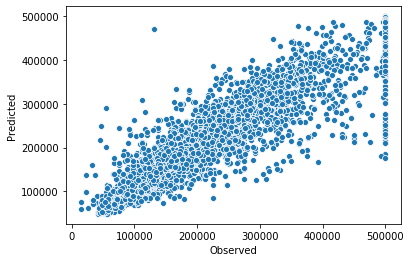

In [68]:
sns.scatterplot(df["Observed"], df["Predicted"]).plot()


In [ ]:
#Xgboosting
param_grid3 = [
 {'bootstrap': [False, True], 'n_estimators':  list(range(30,50, 2)), 'max_features': list(range(2,15, 2))},
 ]
param_grid2